# Regression_Housing_ANN(MLP)

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing()

In [3]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [4]:
X_train_full.shape    ,  X_train.shape,   X_valid.shape,      X_test.shape

((15480, 8), (11610, 8), (3870, 8), (5160, 8))

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
from tensorflow import keras

In [7]:
model = keras.models.Sequential(
        [keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
         keras.layers.Dense(1)]
        )

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="mean_squared_error", optimizer="sgd")
# model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))  #if we want to change the learning rate

In [10]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)


In [11]:
history = model.fit(X_train, y_train,     epochs=200,      validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 0s 887us/step - loss: 0.9724 - val_loss: 1.0628
Epoch 2/200
363/363 [==============================] - 0s 631us/step - loss: 0.5638 - val_loss: 0.4804
Epoch 3/200
363/363 [==============================] - 0s 605us/step - loss: 0.4821 - val_loss: 0.4329
Epoch 4/200
363/363 [==============================] - 0s 608us/step - loss: 0.4583 - val_loss: 0.4251
Epoch 5/200
363/363 [==============================] - 0s 607us/step - loss: 0.4478 - val_loss: 0.4077
Epoch 6/200
363/363 [==============================] - 0s 599us/step - loss: 0.4260 - val_loss: 0.3925
Epoch 7/200
363/363 [==============================] - 0s 612us/step - loss: 0.4154 - val_loss: 0.3860
Epoch 8/200
363/363 [==============================] - 0s 589us/step - loss: 0.4065 - val_loss: 0.4062
Epoch 9/200
363/363 [==============================] - 0s 602us/step - loss: 0.3999 - val_loss: 0.3728
Epoch 10/200
363/363 [==============================] - 0s 620us/step - l

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.972359,1.062751
1,0.563761,0.480439
2,0.482126,0.432931
3,0.458319,0.425117
4,0.447764,0.407670
5,0.426000,0.392452
6,0.415378,0.386023
7,0.406504,0.406157
8,0.399916,0.372791
9,0.394467,0.393397


<AxesSubplot:>

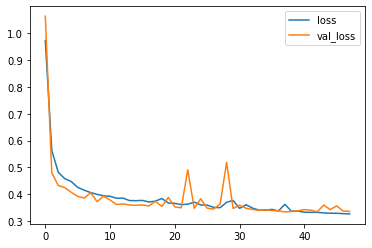

In [14]:
pd.DataFrame(history.history).plot()

In [15]:
# Or

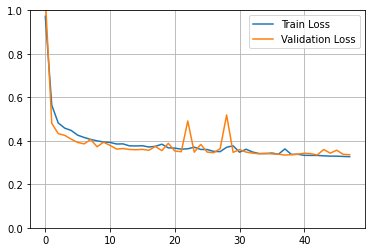

In [16]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(['Train Loss','Validation Loss'])
plt.show()

In [17]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 484us/step - loss: 0.3323


In [16]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

In [17]:
y_pred

array([[1.3877509],
       [3.1859558],
       [4.624016 ]], dtype=float32)

In [18]:
y_test[:3]

array([1.925  , 3.821  , 5.00001])

***
### EXTRA:
### SAVING MODEL:

In [19]:
model.save("my_keras_model.h5")

### LOADING MODEL:

In [20]:
model2 = keras.models.load_model("my_keras_model.h5")

In [21]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model2.predict(X_new)

In [22]:
y_pred

array([[1.3877509],
       [3.1859558],
       [4.624016 ]], dtype=float32)

In [23]:
y_test[:3]

array([1.925  , 3.821  , 5.00001])

### SAVING WEIGHTS:

In [24]:
model.save_weights("my_keras_weights.ckpt")

### LOADING WEIGHTS:

In [26]:
model.load_weights("my_keras_weights.ckpt")